# Построение трехмерных графиков в библиотеке Matplotlib

Первоначально библиотека Matplotlib была создана в расчете на построение только двумерных графиков. В период выпуска версии 1.0 на основе имевшегося в библиотеке Matplotlib двумерного отображения графиков были созданы некоторые трехмерные утилиты построения графиков, что привело к удобному (хотя и несколько ограниченному в возможностях) набору инструментов для трехмерной визуализации данных. Мы активизируем возможность построения трехмерных графиков путем импорта набора инструментов mplot3d, включенного в основной установочный пакет библиотеки Matplotlib:

In [1]:
from mpl_toolkits import mplot3d

После импорта этого подмодуля появляется возможность создавать трехмерные системы координат путем передачи ключевого слова projection='3d' любой из обычных функций создания систем координат:

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

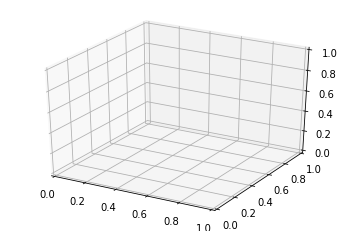

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')

С помощью такой трехмерной системы координат можно строить различные виды трехмерных графиков. Построение трехмерных графиков — один из видов функциональности, для которого очень полезен интерактивный, а не статический просмотр рисунков в блокноте. Напомню, что для работы с интерактивными рисунками необходимо вместо команды %matplotlib inline использовать команду %matplotlib notebook.

## Трехмерные точки и линии

Линейный график и диаграмма рассеяния — простейшие трехмерные графики, создаваемые на основе множеств кортежей из трех элементов (x, y, z). По аналогии с обсуждавшимися ранее более распространенными двумерными графиками их можно создать с помощью функций ax.plot3D и ax.scatter3D. Сигнатуры вызовов этих функций практически совпадают с их двумерными аналогами, поэтому вы можете обратиться к разделам «Простые линейные графики» и «Простые диаграммы рассеяния» этой главы за более подробной информацией по настройке вывода ими данных. Мы построим график тригонометрической спирали, а также нарисуем рядом с кривой несколько точек:

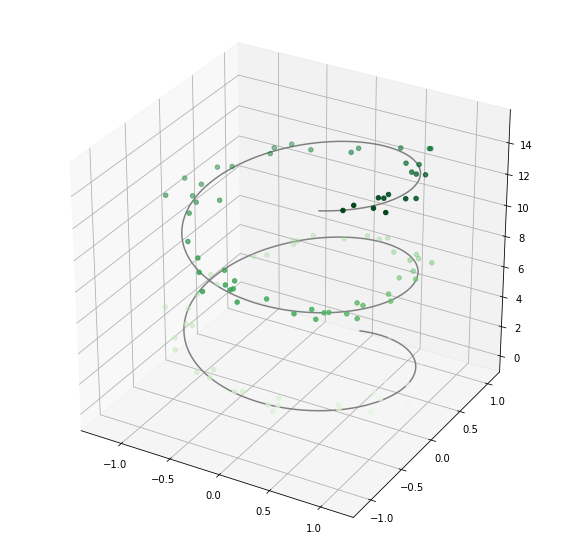

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

# Данные трехмерной кривой
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Данные для трехмерных точек
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Обратите внимание, что по умолчанию степень прозрачности рассеянных по графику точек настраивается таким образом, чтобы придать графику эффект глубины. Хотя в статическом изображении этот трехмерный эффект иногда незаметен, динамическое представление может дать информацию о топологии точек.

## Трехмерные контурные графики 

Аналогично контурным графикам, рассмотренным нами в разделе «Графики плотности и контурные графики» этой главы, mplot3d содержит инструменты для создания трехмерных рельефных графиков на основе тех же входных данных. Подобно двумерным графикам, создаваемым с помощью функции ax.contour, для функции ax.contour3D необходимо, чтобы все входные данные находились в форме двумерных регулярных сеток, с вычислением данных по оси Z в каждой точке. Мы продемонстрируем трехмерную контурную диаграмму трехмерной синусоиды:

In [8]:
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Text(0.5, 0, 'z')

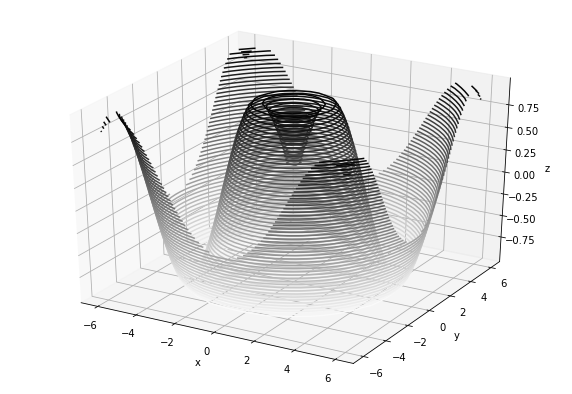

In [15]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Иногда используемый по умолчанию угол зрения неидеален. В этом случае можно воспользоваться методом view_init для задания угла возвышения и азимутального угла. В нашем примере (результат которого показан ниже) используется угол возвышения 60 градусов (то есть 60 градусов над плоскостью X-Y) и азимут 35 градусов (то есть график повернут на 35 градусов против часовой стрелки вокруг оси Z):

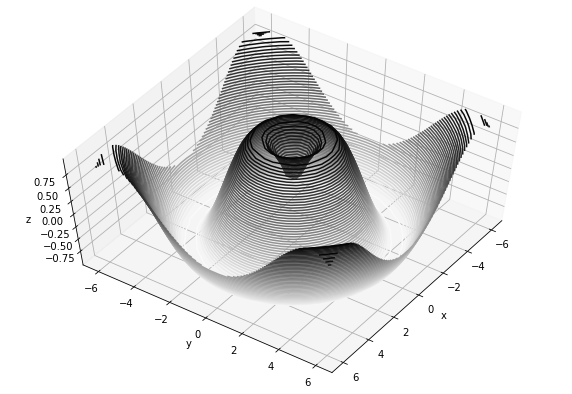

In [16]:
ax.view_init(60, 35)
fig

## Каркасы и поверхностные графики

Каркасы и поверхностные графики — еще два типа трехмерных графиков, подходящих для данных с привязкой к координатам. Они выполняют проекцию координатных значений на заданную трехмерную поверхность, облегчая наглядное представление полученных трехмерных фигур. Вот пример с каркасом:

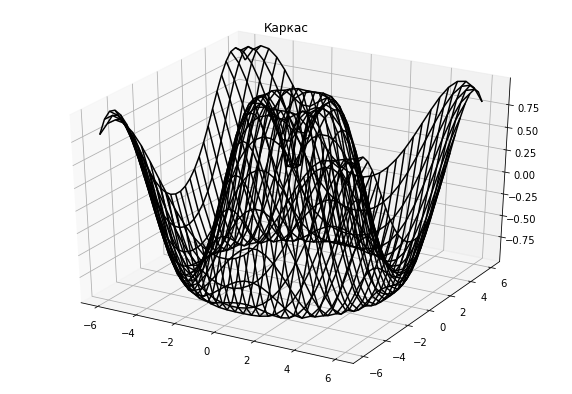

In [17]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('Каркас');

Поверхностный график аналогичен графику каркаса, но каждая грань представляет собой заполненный многоугольник. Добавление карты цветов для заполненных многоугольников помогает лучше прочувствовать топологию визуализируемой поверхности:

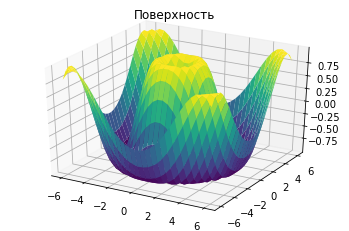

In [18]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Поверхность');

Обратите внимание, что, хотя координатные значения для поверхностного графика должны быть двумерными, он не обязан быть прямолинейным. Вот пример создания неполной сетки в полярной системе координат, которая при использовании для построения графика функции surface3D дает нам срез визуализируемой функции:

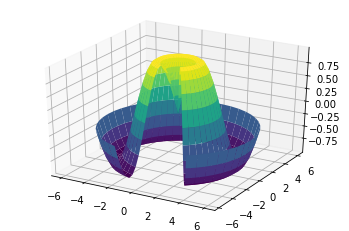

In [21]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none');

Триангуляция поверхностей

## Триангуляция поверхностей

В некоторых приложениях необходимые для предыдущих операций равномерно дискретизированные координатные сетки неудобны и накладывают слишком много ограничений. В таких случаях могут быть удобны графики, основанные на координатной сетке из треугольников. Что, если вместо равномерно выбранных значений из декартовой или полярной систем координат, мы имеем дело с набором случайно выбранных значений?

In [22]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

Нарисуем диаграмму рассеяния точек, чтобы представить себе вид поверхности, которую мы дискретизируем:

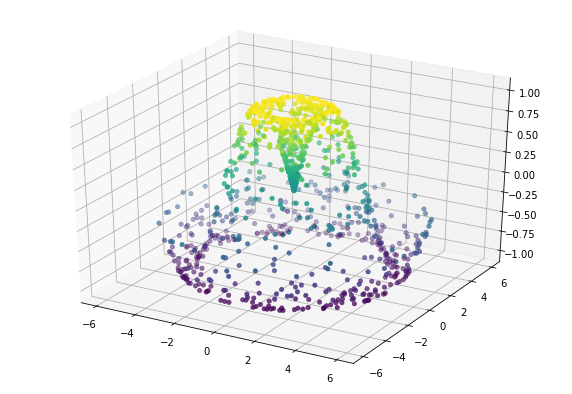

In [25]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

Полученное оставляет желать лучшего. В подобном случае нам поможет функция ax.plot_trisurf, предназначенная для создания поверхности путем поиска сначала набора треугольников, расположенных между смежными точками:

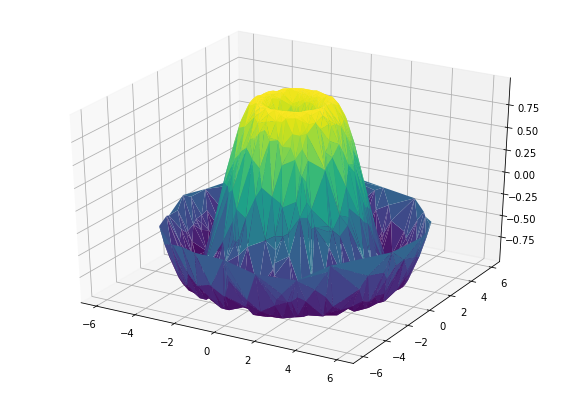

In [26]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none');

Результат не такой красивый, как при построении графика с помощью координатной сетки, но гибкость подобной триангуляции дает возможность создавать интересные трехмерные графики. Например, с помощью этого метода можно даже нарисовать трехмерную ленту Мебиуса.

#### Пример: визуализация ленты Мебиуса

Лента Мебиуса представляет собой полоску бумаги, склеенную в кольцо концами, перевернутыми на 180 градусов. Она весьма интересна топологически, поскольку у нее, несмотря на внешний вид, только одна сторона! В этом разделе мы визуализируем ее с помощью трехмерных инструментов библиотеки Matplotlib. Ключ к созданию ленты Мебиуса — ее параметризация. Это двумерная лента, поэтому нам понадобятся для нее две собственные координаты. Назовем одну из них θ (ее диапазон значений — от 0 до 2π), а вторую — w, с диапазоном значений от –1 на одном краю ленты (по ширине) до 1 на другом:

In [27]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

Теперь нам нужно на основе этой параметризации вычислить координаты (x, y, z) ленты.

Размышляя, можно понять, что в данном случае происходят два вращательных движения: одно — изменение расположения кольца относительно его центра (координата, которую мы назвали θ), а второе — скручивание полоски относительно ее оси координат (назовем эту координату ϕ). Чтобы получилась лента Мебиуса, полоска должна выполнить половину скручивания за время полного сворачивания в кольцо, то есть Δϕ = Δθ / 2.

In [28]:
phi = 0.5 * theta

Теперь вспомним тригонометрию, чтобы выполнить трехмерное наложение. Определим переменную r — расстояние каждой точки от центра и воспользуемся ею для нахождения внутренних координат (x, y, z):

In [29]:
# радиус плоскости X-Y
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

Для построения графика этого объекта нужно убедиться, что триангуляция выполнена правильно. Лучший способ сделать это — описать триангуляцию в координатах базовой параметризации, после чего позволить библиотеке Matplotlib выполнить проекцию полученной триангуляции в трехмерное пространство ленты Мебиуса. Это можно сделать следующим образом:

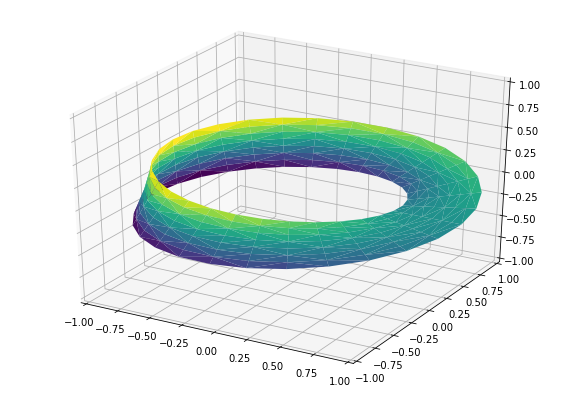

In [30]:
# Выполняем триангуляцию в координатах базовой параметризации
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1);

Сочетая все эти методы, можно создавать и отображать в Matplotlib широкий диапазон трехмерных объектов и пространственных моделей.